# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [1]:
import numpy as np
from skimage.io import imread


img = imread(r'chain_small.JPG')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

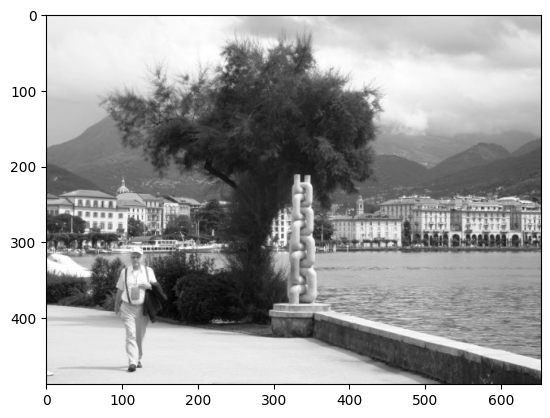

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [210]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

Text(0, 0.5, 'Значения диагональных элементов')

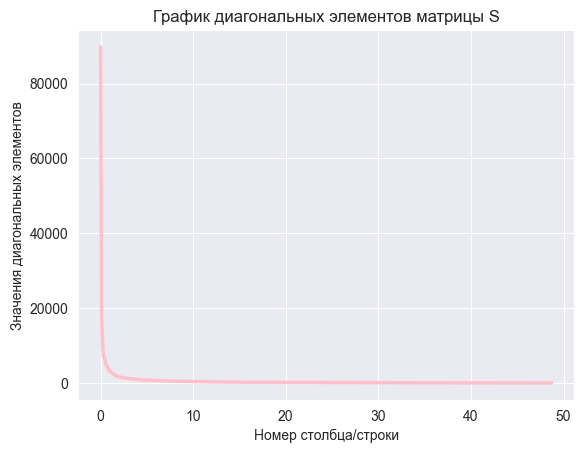

In [211]:
# Заполним значения у - диагональные элементы матрицы S
# Значения х
x = np.arange(0,48.8 , 0.1)

# Строим график
line = plt.plot(x, S, c = 'pink')
plt.setp(line, linewidth=2.5)


# Задаем заголовок и метки осей
plt.title('График диагональных элементов матрицы S')
plt.xlabel('Номер столбца/строки')
plt.ylabel('Значения диагональных элементов')



Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

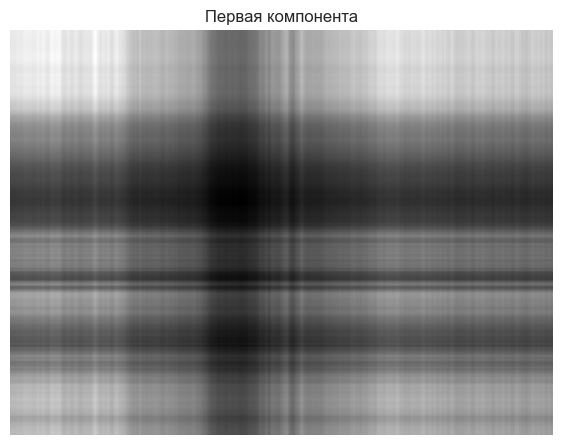

In [213]:
# Составим одну компоненту 
component_1 = np.outer(U[:,0], VT[0,:]) * S[0]

fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.imshow(component_1, cmap='gray')
axs.set_title('Первая компонента', fontsize=12)
axs.set_axis_off()
plt.show()

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

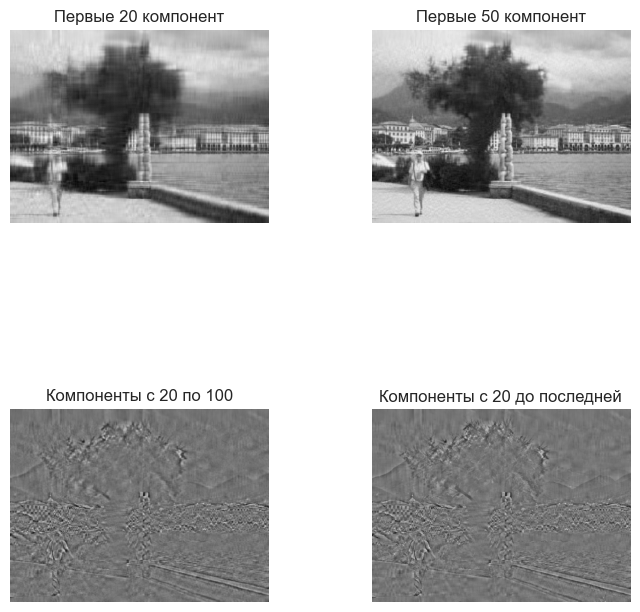

In [214]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.subplots_adjust(wspace=0.4, hspace=0.6)

axs[0, 0].imshow(sum_components_1_20, cmap='gray')
axs[0, 0].set_title('Первые 20 компонент', fontsize=12)
axs[0, 0].set_axis_off() # удаление осей

axs[0, 1].imshow(sum_components_1_50, cmap='gray')
axs[0, 1].set_title('Первые 50 компонент', fontsize=12)
axs[0, 1].set_axis_off() # удаление осей

axs[1, 0].imshow(sum_components_20_100, cmap='gray')
axs[1, 0].set_title('Компоненты с 20 по 100', fontsize=12)
axs[1, 0].set_axis_off() # удаление осей

axs[1, 1].imshow(sum_components_20_last, cmap='gray')
axs[1, 1].set_title('Компоненты с 20 до последней', fontsize=12)
axs[1, 1].set_axis_off() # удаление осей

plt.show()



**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

Необходимо выбрать компоненты, которые наилучшим образом восстанавливают исходное изображение, тогда для первых k компонент оценить степень восстановления можно, посчитав расстояние по норме Фробениуса от данной матрицы до матрицы для исходного изображения.

По графику изучим вклады компонент (график отражает зависимоть между количеством k первых компонент в матрице и расстоянием от полученной матрицы до матрицы для исходного изображения, вычисленным по норме Фробениуса). Заметим, что чем меньше значение расстояние, тем лучше эти компоненты приближают исходное изображение, по графику видно, что нам нужно брать как можно большее значение k. (можно было бы не запариваться с графиком, но все же вот :))

Почему нам стоит брать компоненты именно с первой? Итоговая матрица - это сумма всех компонент:

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

В сингулярном разложении матрицы значения в матрице $\Sigma$ упоряжочены по возрастанию, то есть первые компоненты вносят больший вклад, так как умножаются на большее значение $\sigma_{i}$, последние же значения вообще могут быть нулевыми, то есть чтобы получить как можно меньшее расстояние между матрицами, нужно начинать суммировать компоненты, начиная с первой (об этом же говорит теорема Эккорта-Янга)


Поэтому резонно брать компоненты, начиная с первой,  до тех пор, пока они вносят какой-то ненулевой вклад в общую сумму (пока $\sigma_{k} != 0$). Если подробнее изучить матрицу S, то можно заметить, что она не содержит нулевых значений на диагонали, поэтому необходимо проссумировать все компоненты для достижения наибольшей точности).

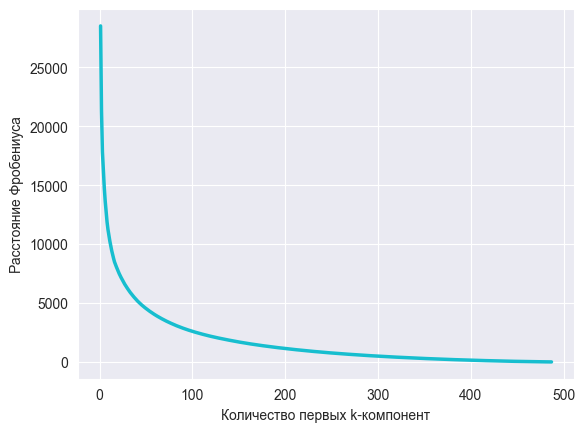

In [215]:
#Считем расстояния 
frobenius_distances = []
for k in range(1,S.size ):
    A_approx = np.dot(U[:, :k], np.dot(np.diag(S[:k]), VT[:k, :]))
    dist = np.linalg.norm(img - A_approx)
    frobenius_distances.append(dist)

# Строим график
line = plt.plot(np.arange(1, S.size), frobenius_distances, c = '#17becf')
plt.setp(line, linewidth=2.5)
plt.xlabel("Количество первых k-компонент")
plt.ylabel("Расстояние Фробениуса")
plt.show()


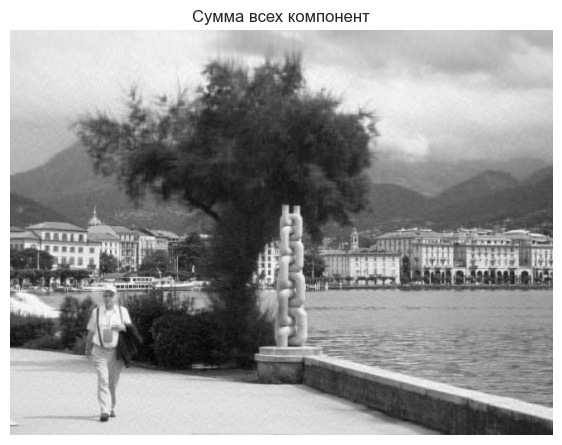

In [216]:
sum_components_100_sizeIMG = np.sum([np.outer(U[:,i], VT[i,:]) * S[i] for i in range(100)], axis=0)

fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.imshow(sum_components_100_sizeIMG, cmap='gray')
axs.set_title('Сумма всех компонент', fontsize=12)
axs.axis('off')
plt.show()

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

Если размер исходного изображения был равен $m\cdot n$, то есть с учетом того, что там хранятся значения типа double, это займет $8mn$ байт.

После сингулярного разложения и применения теоремы о низкоранговом приближении нам потребуется хранить матрицы $U, \Sigma_{k}, VT$, которые имеют соответствующие размеры: $k\cdot m, k, k\cdot n$, то есть суммарно потребуется памяти : $8k\cdot (m + n + 1)$, где $k\in [1, max(m, n) = rk(IMG)]$

Теоретически потребуется памяти меньше в такое количество раз : $\frac{(m + n + 1)k}{mn}$

Решено было взять первые 100 компонент, так как по графику при $k > 100$ компоненты вносят меньший вклад в формирование изображения.

Относительный выигрыш памяти : $\frac{488\cdot 653}{100(488 + 653 + 1)} = 2.79$

Так, новая матрица должна весить $100\cdot (488 + 653 + 1) \cdot 8 = 913600$ байт

**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

Посчитаем, сколько реально памяти занимает изображение (матрица img) и 100 первых компнент ее сингулярного разложения:

In [217]:
import sys 
print("Размер исходного изображения : ", img.nbytes)
print("Размер изображения после сингулярного разложения матрицы : ", sum_components_100_sizeIMG.nbytes)
print("Размер 100 компонент сингулярного разложения матрицы изображения : ", U[:, 0:100].nbytes + S[0:100].nbytes + VT[0:100, :].nbytes)

Размер исходного изображения :  2549312
Размер изображения после сингулярного разложения матрицы :  2549312
Размер 100 компонент сингулярного разложения матрицы изображения :  913600


То количество байт, которое мы посчитали теоретически - это просто сумма компонент сингулярного разложения, но само изображение, получаемое в результате перемножения этих матриц, весит столько же, сколько и исходное изображение.

Получется, что размер перемноженных компонент усеченного сингулярного разложения может быть больше, чем размер отдельных компонент. Так получается потому что в процессе усечения мы отбрасываем часть компонент, которые не имеют наибольшего вклада (например, храним для матрицы $\Sigma$ только ее диагональные значения, забывая про ее исходный размер, кторый необходим для корректного перемножения матриц) в описании изображения, и оставляем только наиболее значимые компоненты.  

Однако, после перемножения выбранных усеченных компонент, мы получаем новое изображение, которое уже содержит информацию, которая ранее была разбита между отдельными компонентами. Это позволяет нам более эффективно описать исходное изображение за счет сжатия информации в меньшее количество компонент.

### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.


**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**Подсказки:**
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$ выразите вектор $w$ как $\alpha\cdot v$, где $|v|=1$, и рассмотрите описанное выражение
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$ представьте $w$ в виде линейной комбинации ортонормированного базиса, состоящего из собственных векторов оператора $X^TX$, и внимательно посмотрите на произведение $wX^TXw$
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$ разложите матрицу $X$ в SVD-разложение, а векторы $u$ и $w$ представьте в виде линейной комбинации векторов, являющихся столбцами матриц $U$ и $V$.

Докажем по порядку каждое из трёх равенств.

1. Заметим, что любой вектор мы можем отнормировать (возьмем $w = \alpha v, \|v\| = 1$, тогда значение : 
$\frac{|Xw|}{|w|} = |Xv| \to \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|v| = 1}~|Xv|$ (вынесем модуль скаляра $\alpha = \sqrt{\Sigma_{i = 1}^{n}w_i^2}$ слева из числителя и знаменателя). Далее, докажем второе равенство, из которого следует первое.

2. Рассмотрим выражерние $x^TA^TAx = \|Ax\|^2$ для некоторого вектора $x$, такого, что  $\|x\| = 1$:

$$x^TA^TAx = x^T(\lambda x) = \lambda (x^Tx) = \lambda \|x\|^2 = \sigma \|x\|^2 = \sigma$$

Если $A$ - матрица некоторого линейного отображения, тогда из доказательства теоремы о сингулярных базисах, если к линейномц отображению применить сопряженное к нему, то получим самосопрояженный линейный оператор с матрицей $A^TA$, который в некотором ортогнальном базисе имеет диагональный вид.

Отсюда, максимальная длина такого вектора (то есть $max_x\|Ax\|$) равняется максимальному значению $\sigma = \sigma_1$.

3. Разложим матрицу $A = U\Sigma V^T$, возьмем векторы $u:=\{a_1U^1 + ... + a_mU^m,\|u\| = 1 \}  \to U^Ta = u $ , $v:=\{b_1V^1 + ... + b_nV^n,\|v\| = 1\} = Vb \to V^Tb  = v$.


$u^TAv = u^TU\Sigma V^Tv = a^TUU\Sigma V^TV^Tb = (a_1|u_1| ... a_m|u_m|)\Sigma (b_1|v_1| ... b_n|u_n|)^T = (a_1 ... a_m)\Sigma (b_1 ... b_n)^T \to max$

Промаксимизируем выражение $u^TAv = \sum_{i = 1}^r a_ib_i\sigma _i$:

Оно тем больше, чем больше $\sigma_i$ - это $\sigma_1$, тогда требуем, чтобы $a_1, b_1$ были наибольшими, тогда в силу нормированности векторов $u, v$ максимум достигается при $a_1 = b_1 = 1, a_2 = ...  = a_r = b_1 = ... = b_r = 0$.

Тогда максимум выражения $u^TAv = \sigma _1$


**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортонормированными столбцами размера $n\times r$, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$. 

Заметим, что данная матрица получается так:

$(\sin 0 ... \sin (n-1))^T (\cos 0 ... \cos (n-1))$ , отсюда получаем, что линейная комбинация столбцов исходной матрицы - это столлбцы синусов первых n натрульных чисел с весами - косинусами этих n натурльных чисел, то есть базис системы векторов-столцов матрицы равен 1, отсюда $rkaA = 1$.

Тогда посчитаем сигнулярное разложение матрицы: в этом случае $r=1$, то есть матрица $\Sigma $ имеет размер $1\times 1$, а матрицы $U, V$ - вектры-столбцы, тогда сингулярное разложение имеет вид (заметим, что собственное значение такой матрицы : $\lambda = 1$ ,  так как $cos(0) = 1$, то есть $cos(0)*v = Av$, где $v = (\sin 0 ... \sin (n-1))^T$ - собственный вектор)

Разложение имеет вид:
$(\sin 0 ... \sin (n-1))^T (\cos 0 ... \cos (n-1))$ 

**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

Матрицы $U$ и $V$ ортогональны, значит можем домножить матрицу $A$ слева и справа на $U^{-1}$ и $V$, получим $U^{-1}AV=\Sigma$, которая имеет вид $\Sigma=diag(\sigma_1,...,\sigma_r)$, и из определения матрицы линейного отображения видно, что $\mathcal{A}v_i=\sigma_iu_i\neq 0$ для $i\leqslant r$ и $\mathcal{A}v_j=0$ для $j>r$ в новых базисах. 

Ядро $\ker\mathcal{A}=\langle v_{r+1}, \ldots, v_n \rangle$: вектор $v=\alpha_1v_1+...+\alpha_nv_n$ лежит в ядре тогда и только тогда, когда $\mathcal{A}(\alpha_1v_1+...+\alpha_nv_n)=\alpha_1\mathcal{A}v_1+...+\alpha_n\mathcal{A}v_n=\alpha_1\sigma_1 u_1+...+\alpha_r\sigma_ru_r+0+...+0=0$. В силу линейной независимости векторов $u_1,...,u_r$ все $\alpha_i=0$ при $i\leqslant r$. Получаем, что $v=\alpha_{r+1}v_{r+1}+...+\alpha_nv_n\in\langle v_{r+1}, \ldots, v_n \rangle$.

Образ этого линейного отображения равен $\text{Im}\mathcal{A}=\langle \mathcal{A}v_1, \ldots, \mathcal{A}v_n \rangle=\langle \sigma_1 u_1, \ldots, \sigma_r u_r,0,\ldots, 0\rangle=\langle u_1, \ldots, u_r \rangle$.

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

Заметим, что при умножении на матрицу $P$ вектора $v$, получим ортогональную проекцию вектора на подпространство столбцов $A$.

Пусть разложение матрицы $A = U\Sigma V^T$, тогда рассмотрим матрицу $P$:

для удобства усечем $\Sigma$ в середине, чтобы удобно работать с поиском обратной матрицы ($\Sigma^T\Sigma)

$P = U\Sigma V^T (V\Sigma^TU^TU\Sigma V^T)^{-1}V\Sigma^TU^T = U\Sigma V^T (V\Sigma ^2 V^T)^{-1}V\Sigma^TU^T = U\Sigma V^T(V^T)^{-1}(\Sigma^2)^{-1}(V)^{-1}V\Sigma^TU^T=U\Sigma(\Sigma^2)^{-1}\Sigma^TU^T$

Покажем, что $M = \Sigma(\Sigma^2)^{-1}\Sigma^T$ -  есть диагональная матрица



$$
\begin{pmatrix}
    \sigma_1 & ... & 0\\
    \vdots & \ddots & \vdots\\
    0 & ... & \sigma_n\\
    0 & ... & 0\\
    \vdots & \ddots & \vdots\\
    0 & ... & 0
\end{pmatrix}\cdot
\begin{pmatrix}
    \sigma_1^2 & ... & 0\\
    \vdots & \ddots & \vdots\\
    0 & ... & \sigma_n^2
\end{pmatrix}^{-1}\cdot
\begin{pmatrix}
    \sigma_1 & ... & 0 & 0 & ... & 0\\
    \vdots & \ddots & \vdots & \vdots & \ddots & \vdots\\
    0 & ... & \sigma_n & 0 & ... & 0\\
\end{pmatrix}
=$$
$$=
\begin{pmatrix}
    \sigma_1 & ... & 0\\
    \vdots & \ddots & \vdots\\
    0 & ... & \sigma_n\\
    0 & ... & 0\\
    \vdots & \ddots & \vdots\\
    0 & ... & 0
\end{pmatrix}\cdot
\begin{pmatrix}
    \frac{1}{\sigma_1^2} & ... & 0\\
    \vdots & \ddots & \vdots\\
    0 & ... & \frac{1}{\sigma_n^2}
\end{pmatrix}\cdot
\begin{pmatrix}
    \sigma_1 & ... & 0 & 0 & ... & 0\\
    \vdots & \ddots & \vdots & \vdots & \ddots & \vdots\\
    0 & ... & \sigma_n & 0 & ... & 0\\
\end{pmatrix}
=$$
$$=
\begin{pmatrix}
    \frac{1}{\sigma_1} & ... & 0\\
    \vdots & \ddots & \vdots\\
    0 & ... & \frac{1}{\sigma_n}\\
    0 & ... & 0\\
    \vdots & \ddots & \vdots\\
    0 & ... & 0
\end{pmatrix}\cdot
\begin{pmatrix}
    \sigma_1 & ... & 0 & 0 & ... & 0\\
    \vdots & \ddots & \vdots & \vdots & \ddots & \vdots\\
    0 & ... & \sigma_n & 0 & ... & 0\\
\end{pmatrix}
=$$
$$=
\begin{pmatrix}
    1 & ... & 0 & 0 & ... & 0\\
    \vdots & \ddots & \vdots & \vdots & \ddots & \vdots\\
    0 & ... & 1 & 0 & ... & 0\\
    0 & ... & 0 & 0 & ... & 0\\
    \vdots & \ddots & \vdots & \vdots & \ddots & \vdots\\
    0 & ... & 0 & 0 & ... & 0\\
\end{pmatrix}
$$


**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


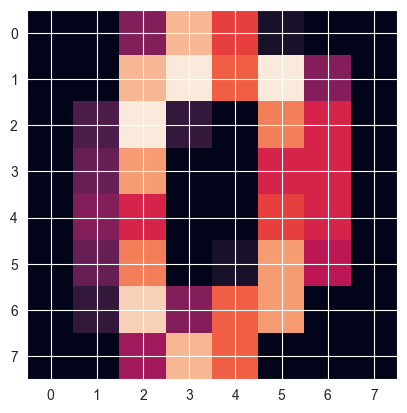

In [218]:
from sklearn import datasets

digits = datasets.load_digits()

X = digits.data
y = digits.target


print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [219]:
U, S, Vt = svd(digits.data, full_matrices=False)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

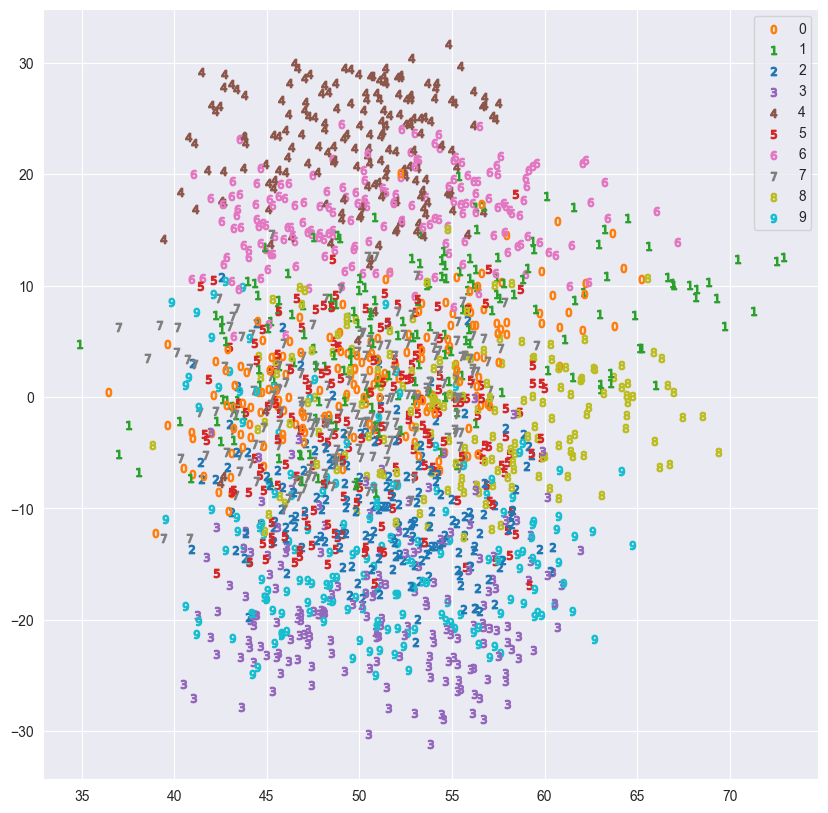

In [220]:
# мы знаем, что проекцию считается как U@S, делаем диагональную из S и берем срез первых двух столбцов
proj = U @ np.diag(S)[:, [0, 1]]

#массив цветов
colors = ['tab:orange', 'tab:green', 'tab:blue', 'tab:purple', 'tab:brown', 'tab:red', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

fig, ax = plt.subplots(figsize=(10, 10))


for i, x, y in zip(range(proj.shape[0]), proj[:, 0], proj[:, 1]): 
    '''
    в зипе группируем 3 элемента итерации, чтобы интерироваться сразу по всем объектам
    i - итерационная переменная
    две остальные - элементы проекции (1 и 2 соотвественно)
    '''
    ax.scatter(x, y, marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])
plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])


**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

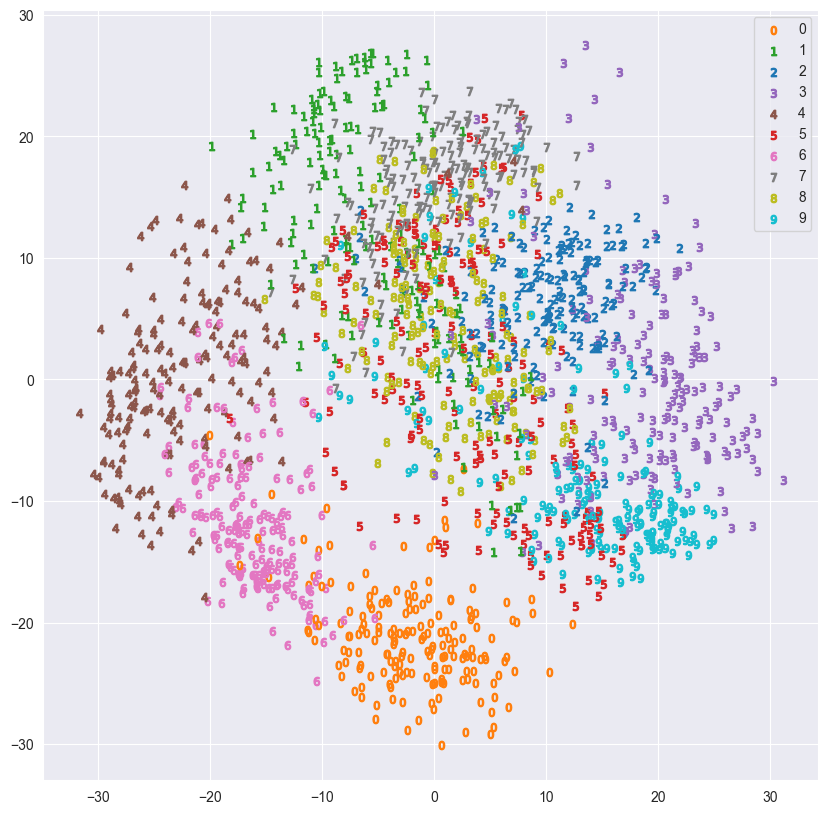

In [221]:
new_digits = digits.data.copy() #скопируем данные


for i in range(new_digits.shape[1]):
    new_digits[:, i] = new_digits[:, i] - np.mean(new_digits[:, i]) #вычитаем среднее значение

# снова строим SVD и беремм проекцию на первые 2
nU, nS, nVT = svd(new_digits, full_matrices=False)
nproj = nU @ np.diag(nS)[:, [0, 1]]


fig, ax = plt.subplots(figsize=(10, 10))
for i, x, y in zip(range(nproj.shape[0]), nproj[:, 0], nproj[:, 1]):
    ax.scatter(x, y, marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])
plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

В первом слуае мы получили более рассеянную картинку, во втором - четко прослеживается кластеризация (цифры сильнее сгруппированы), данные центрированы около точки $(0, 0)$, иными словами, степень разброса данных меньше (дисперсия).

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

Поэксперементируем с разными размерностями: 
поработаем со случайной проекцией на 1, 2, 3-мерное подпространство и сравним с результатом для SVD

Построим для сравнения результатов проекции с помощью сингулярного разложения на 1 и 3-х мерное пространство

In [222]:
from sklearn.random_projection import GaussianRandomProjection

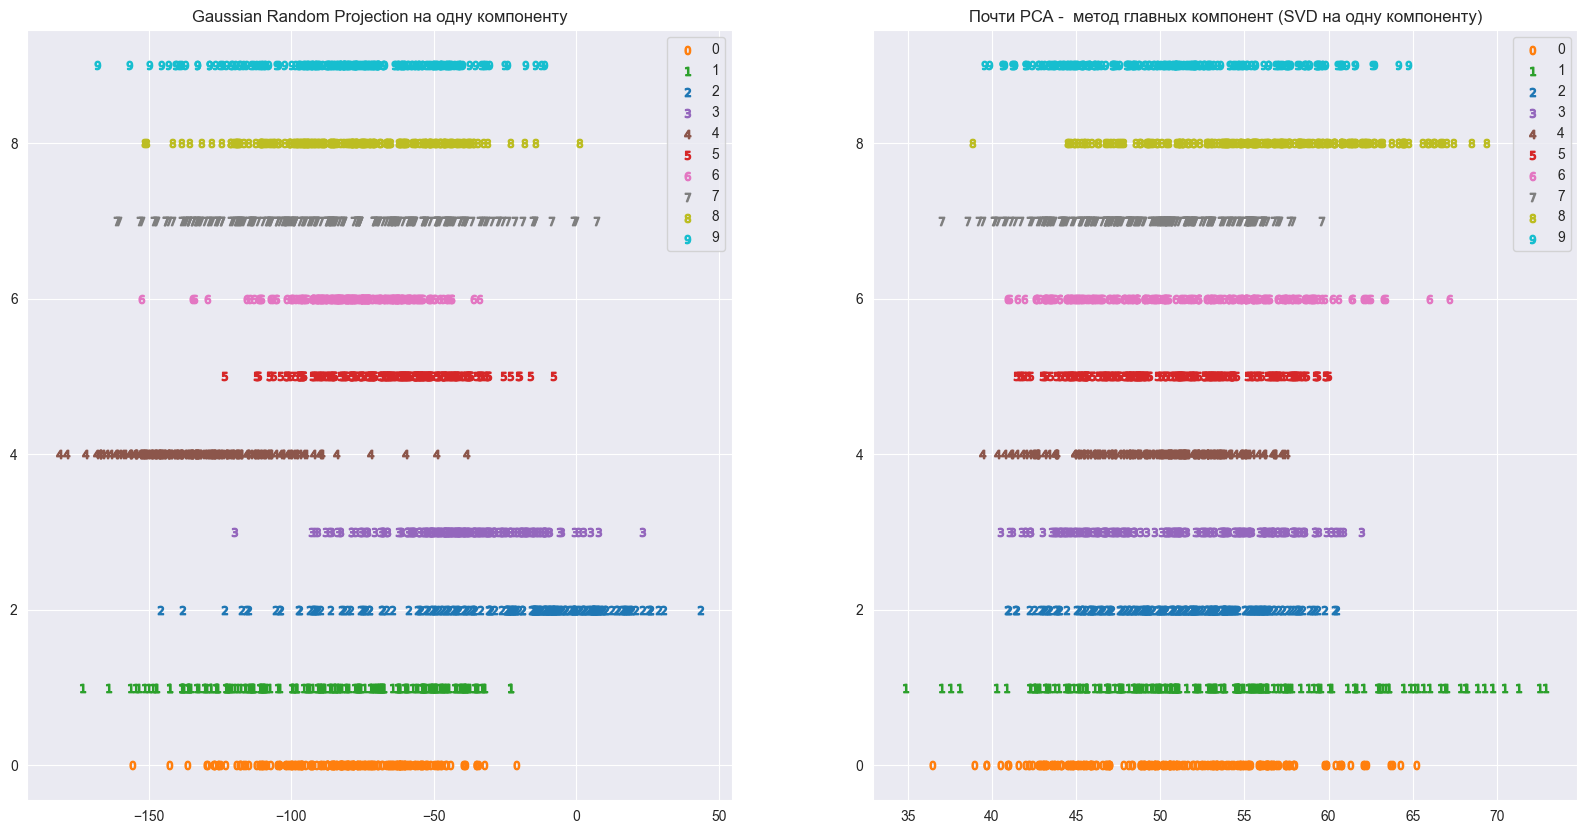

In [223]:
# Создаем экземпляр класса GaussianRandomProjection с n_components=1

transformer = GaussianRandomProjection(n_components=1, random_state=42)

# Применяем гауссовские проекции к данным
X_transformed = transformer.fit_transform(X)

# Создание фигуры и осей
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Первый график
for i in range(X_transformed.shape[0]):
    axs[0].scatter(X_transformed[i, 0], digits.target[i], marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])
axs[0].set_title('Gaussian Random Projection на одну компоненту')
handles = [axs[0].plot([],[],color=color, marker='o', ls="", markersize=np.sqrt(200))[0] for color in colors]
axs[0].legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

# Второй график
gproj = nU @ np.diag(nS)[:, :2]
for i, x in zip(range(gproj.shape[0]), proj[:, 0] ):
    axs[1].scatter(x, digits.target[i], marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])
axs[1].set_title('Почти РСА -  метод главных компонент (SVD на одну компоненту)')
axs[1].legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

plt.show()


Проекция на одномерное проостранство постороена так, что значения, соотвествующие первому признаку цифры лежат на огоризонтальной оси, соответствующей этой цифре.

При проекции на один признак не получили четко выраженых отличий, но если повторить несколько раз компиляцию, то заметим, что в SVD данные более центрированы (в пределах $(35;70)$ против $(-200;50)$). 

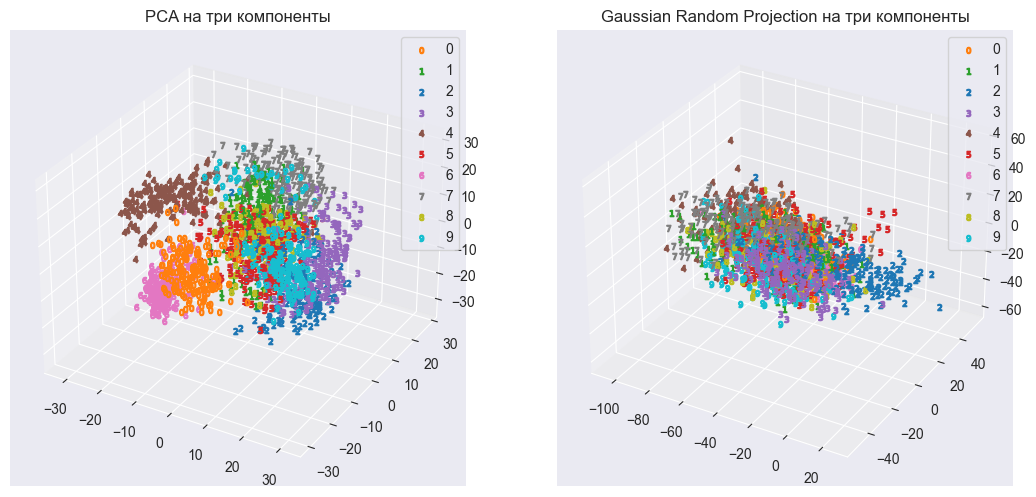

In [224]:
fig = plt.figure(figsize=(20, 10))

# Первый график
ax1 = fig.add_subplot(131, projection='3d')
proj_3 = nU @ np.diag(nS)[:,:3]
for i, x, y, z in zip(range(proj_3.shape[0]), proj_3[:, 0], proj_3[:, 1],  proj_3[:, 2]): 
    ax1.scatter(x, y, z, marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])
ax1.set_title('PCA на три компоненты')
ax1.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

# Второй график
ax2 = fig.add_subplot(132, projection='3d')
transformer = GaussianRandomProjection(n_components=3, random_state=42)
X_transformed = transformer.fit_transform(X)
for i in range(X_transformed.shape[0]):
    ax2.scatter(X_transformed[i, 0], X_transformed[i, 1], X_transformed[i, 2], marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])
ax2.set_title('Gaussian Random Projection на три компоненты')
handles = [ax2.plot([],[],color=color, marker='o', ls="", markersize=np.sqrt(200))[0] for color in colors]
ax2.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

plt.show()


В трехмерном случае актуален вывод, сделаный выше, в РСА - япко выраженная кластеризация.

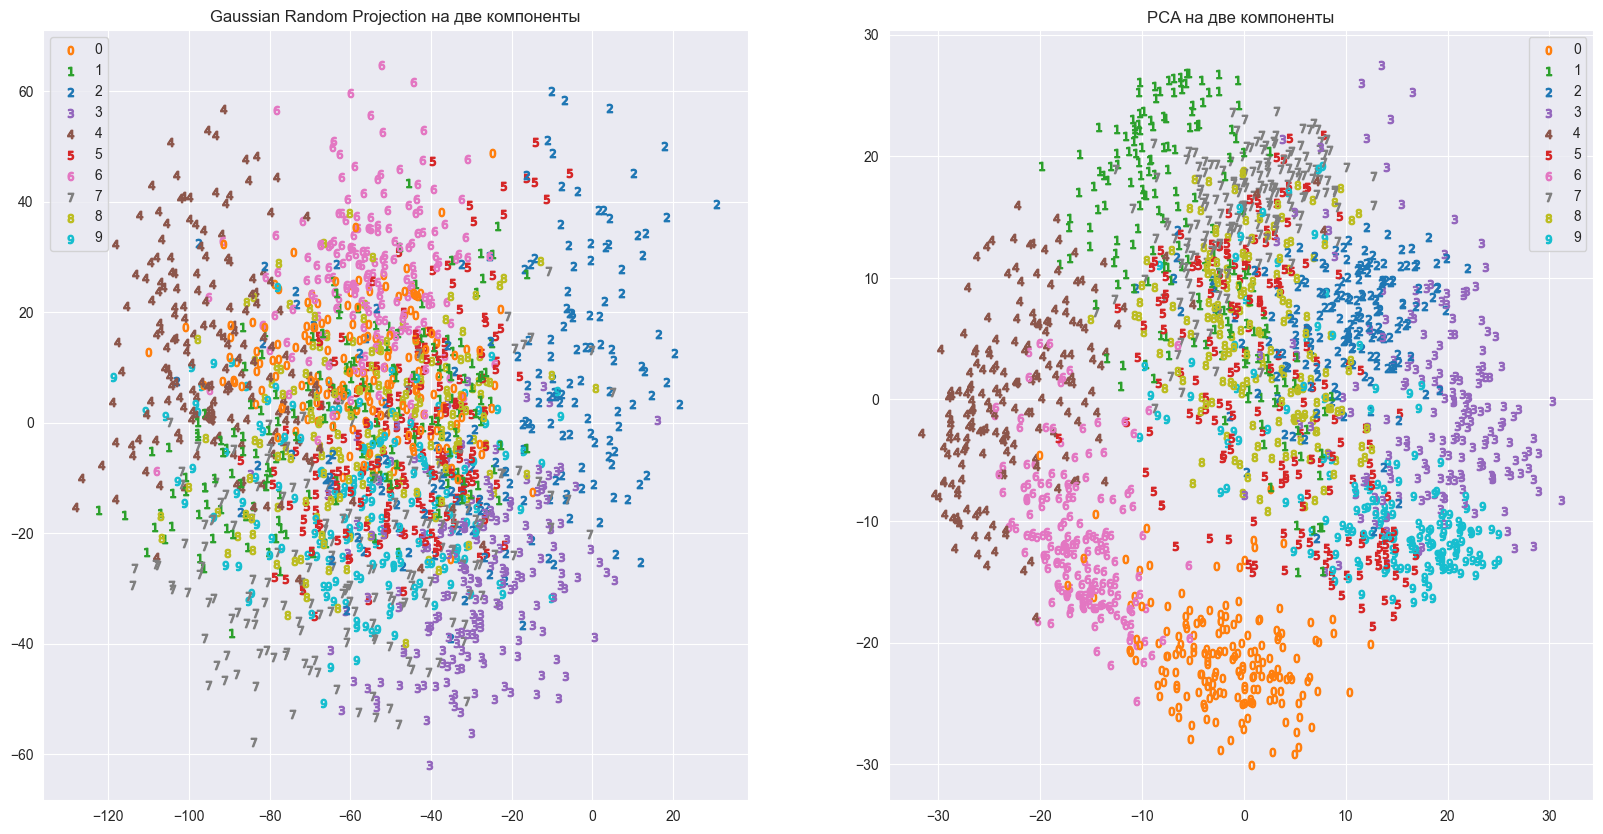

In [225]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Первый график
transformer = GaussianRandomProjection(n_components=2, random_state=42)
X_transformed = transformer.fit_transform(X)
for i in range(X_transformed.shape[0]):
    ax1.scatter(X_transformed[i, 0], X_transformed[i, 1], marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])
ax1.set_title('Gaussian Random Projection на две компоненты')
handles = [ax1.plot([],[],color=color, marker='o', ls="", markersize=np.sqrt(200))[0] for color in colors]
ax1.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

# Второй график
g2_proj = nU @ np.diag(nS)[:, :2]
for i, x, y in zip(range(g2_proj.shape[0]), g2_proj[:, 0], g2_proj[:, 1]): 
    ax2.scatter(x, y, marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])
ax2.set_title('PCA на две компоненты')
ax2.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

plt.show()

Здесь так же данные менее разбросаны в случае РСА.

Вывод, который можно сделать, РСА в среднем лучше проецирует данные, что связано с тем, что в этом способе не используется рандомизация в отличие от GRP (в нем мы проецируем на случайно сгенерированное подпространство).

С другой строны, GRP работает быстрее за счет использования неструктурированых случайных матриц. Также метод случайных проекций гарантирует сохранение большинства важных признаков при понижении размерности, благодаря случайной природе проекций (и сохранению расстояний между объектами данных). Это делает его привлекательным методом для работы с данными, где качество проекции критично, кроме того, это обеспечивает устоойчивость этого метода к выбросам.

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$: 

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, мы сгененерируем много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построим аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`

In [226]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

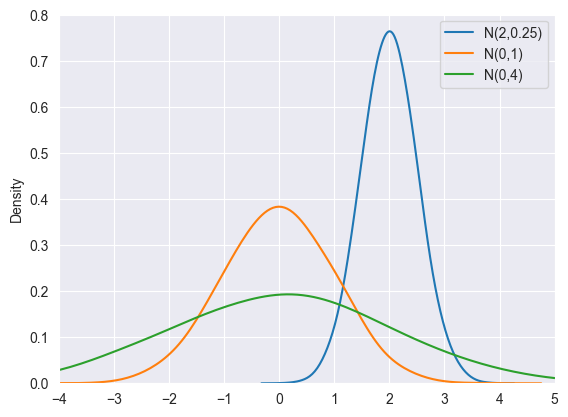

In [229]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.kdeplot(s, 
             bw_adjust=2, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.kdeplot(s, 
             bw_adjust=2, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.kdeplot(s, 
             bw_adjust=2, label='N(0,4)')

plt.legend()
plt.show()


**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**Несколько фактов**

* Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Поверхности уровня $p(x) = c$ — это эллипсоиды.

*  Пользуясь теоремой о приведении квадратичной формы к главным осям, можно показать, что функция плотности многомерного нормального распределения представляется в виде произведения одномерных нормальных плотностей при переходе в новую систему координат. 
$$p(x)=\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}\:\underset{\text{новая система координат}}{\to}\: p(x)=p(x_1)\cdot ...\cdot p(x_n)$$

    В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы (то есть матрица ковариации $\Sigma$ диагональна).

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

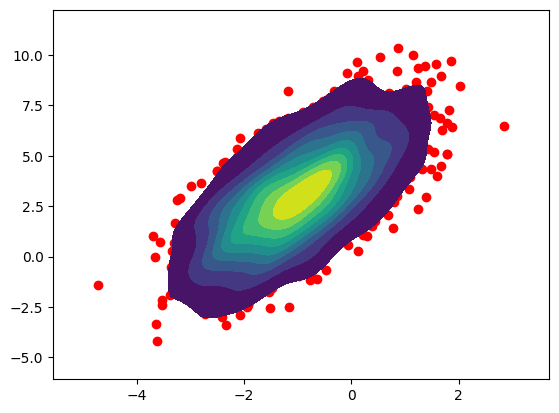

In [11]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(data=s, x=s[:,0], y=s[:,1], fill=True, cmap='viridis')
plt.show()

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**1. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

In [238]:
N = 1000
cov_mat = np.array([
    [1, -2],
    [-2, 5]
])

data = np.random.multivariate_normal(mean=np.array([0, 0]), cov=cov_mat, size=N)

**2. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

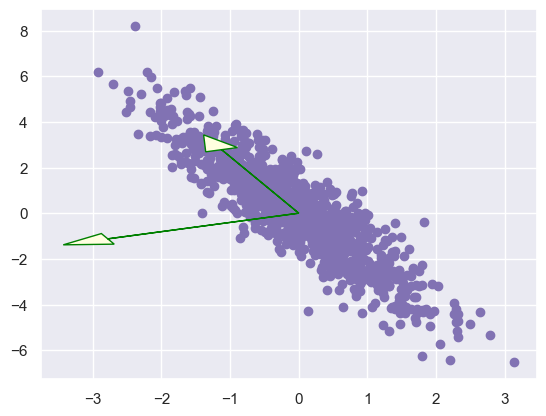

In [246]:
# изобразим данные
plt.scatter(data[:,0], data[:,1], color='m')

mU, mS, mVT = svd(data, full_matrices=False)
plt.arrow(0, 0, 3 * mVT[0, 0], 3 * mVT[0, 1],head_width=0.5, head_length=0.7, fc='lightyellow', ec='green')
plt.arrow(0, 0, 3 * mVT[1, 0], 3 * mVT[1, 1],head_width=0.5, head_length=0.7, fc='lightyellow', ec='green')

**3. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

Приведем к главным осям, выпишем характеристический многочлен: 


$(1-t)(5-t) - 4 = t^2-6t+5-4 = t^2-6t + 1 = 0$

Тогда собственные значения :$SpecA= \{3-2\sqrt{2}, 3 + 2\sqrt{2}\}$

Получили базис (это ФСР для ОСЛУ вида $(A - \lambda E)x = 0$ для каждого собственного значения):

$e_1 = \frac{1}{\sqrt{2\sqrt{2} + 4}} (1 + \sqrt{2}, 1)^T = (0.92388, 0.382683)^T$, $e_2 = \frac{1}{\sqrt{4 - 2\sqrt{2}}} (1 - \sqrt{2}, 1)^T = (-0.382683, 0.92388)^T$

В numpy есть крутая функция, которая считает собстсенные значения и векторы, будем хитренькими и проверим то, что ручками сделали:

In [247]:
lambdas, vectors = np.linalg.eigh(cov_mat)
print(lambdas, vectors, sep='\n')

[0.17157288 5.82842712]
[[-0.92387953 -0.38268343]
 [-0.38268343  0.92387953]]


Результат похожий - полученные собственные векторы пропорциональны соответствующим (каждый полученый вектор лежит в линейной оболочке соответствующего посчитанного с помощью numpy), собственные значения совпадают.

Значит, построение корректно

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**4. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже. 

In [248]:
N = 500
same_cov = np.array([[1,2.151],[2.151,5]])
ellips1 = np.random.multivariate_normal(mean=np.array([-1, 0]), cov=same_cov, size=N)
ellips2 = np.random.multivariate_normal(mean=np.array([1, 0]), cov=same_cov, size=N)

**5. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

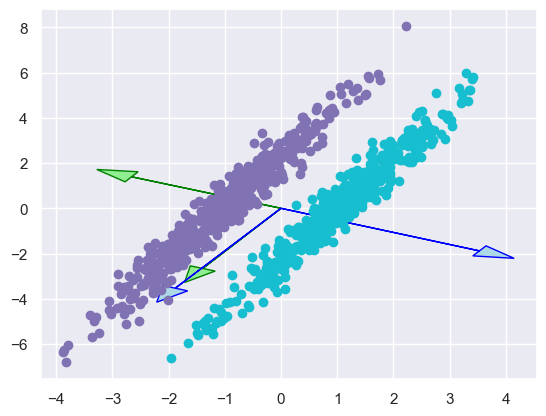

In [249]:
# SVD для эллипсов
nU1, nS1, nVT1 = svd(ellips1, full_matrices=False)
nU2, nS2, nVT2 = svd(ellips2, full_matrices=False)
sns.set_style('darkgrid')

# рисуем векторы-направления новых признаков
plt.arrow(0, 0, 3 * nVT1[0, 0], 3 * nVT1[0, 1], head_width=0.5, head_length=0.7, fc='lightgreen', ec='green')
plt.arrow(0, 0, 3 * nVT1[1, 0], 3 * nVT1[1, 1], head_width=0.5, head_length=0.7, fc='lightgreen', ec='green')
plt.arrow(0, 0, 4 * nVT2[0, 0], 4 * nVT2[0, 1], head_width=0.5, head_length=0.7, fc='lightblue', ec='blue')
plt.arrow(0, 0, 4 * nVT2[1, 0], 4 * nVT2[1, 1], head_width=0.5, head_length=0.7, fc='lightblue', ec='blue')

# рисуем сгенерированные множества
plt.scatter(s1[:,0], s1[:,1], color='m')
plt.scatter(s2[:,0], s2[:,1], color='#17becf')

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**6. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

Не помогает :(

Полученные признаки, соотвествующие векторам - направляющим векторам полуоосей эллипсов, линейно зависимы, то есть, если мы возьмем вектор из линейной оболочки признаков одного кластера данных, то он также будет лежать в другом кластере (несмотря на то, что мы определили, что эти кластеры различны), отсюда получается, что выделить две различные струткуры данных, опираясь на выделенные признаки, мы не можем.

In [ ]:
# Just keep this image as a sample

**7. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

In [250]:
N = 1000
cov_3 = np.array([[1,0],[0,4]])
s3 = np.random.multivariate_normal(mean=np.array([1, 1]), cov=cov_3, size=N)

**8. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

Это будут направления $(1, 0), (0, 1)$, то есть оси х и у.

Пусть у матрицы $\Sigma$ имеется SVD-разложение $U \Sigma V^T$, где $U$ и $V$ -- матрицы из левых и правых сингулярных векторов соответственно, а $\Sigma$ - матрица сингулярных значений. Таким образом, столбцы матрицы $V$ являются нормированными собственными векторами матрицы $\Sigma\Sigma^T$, а элементы матрицы $\Sigma$ равны корням из собственных значений матрицы $\Sigma\Sigma^T$. Для матрицы $\Sigma$ из условия имеем, что $\Sigma\Sigma^T = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}$, поэтому направлениями полуосей эллипса будут оси координат.

**9. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

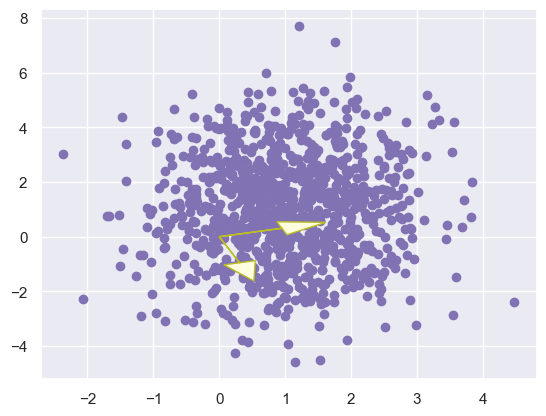

In [251]:
U_3, S_3, VT_3 = svd(s3, full_matrices=False)
fig, ax = plt.subplots()
ax.scatter(s3[:,0], s3[:,1], color='m', label='data')
ax.arrow(0, 0, VT_3[0,0], VT_3[1,0], head_width=0.5, head_length=0.7, fc='lightyellow', ec='#bcbd22')
ax.arrow(0, 0,  VT_3[0,1],  VT_3[1,1], head_width=0.5, head_length=0.7, fc='lightyellow', ec='#bcbd22')
plt.show()


**10. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

Получилость, что направляющие векторы-признаки не совпадают с теоретическим результатом,а сами данные нетцентроованные, из-за чего векторы-признаки выходят не из точки с максимальной коонцетрацией (центр масс).

Отцентрируем данные и повторим реализацию:

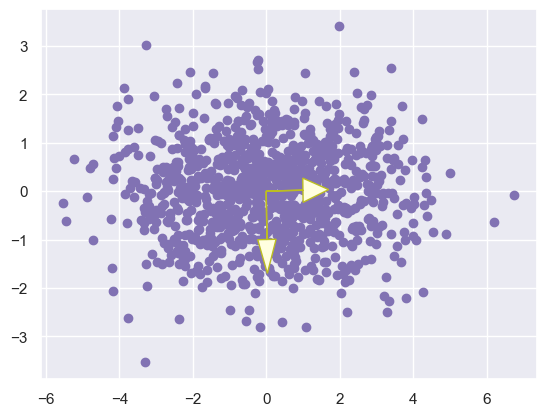

In [252]:
center_s3 = s3.copy() #скопируем данные


for i in range(center_s3.shape[1]):
    center_s3[:, i] = center_s3[:, i] - np.mean(center_s3[:, i]) #вычитаем среднее значение

nU, nS, nVT = svd(center_s3, full_matrices=False)
new_s3 = nU @ np.diag(nS)[:, [0, 1]]


fig, ax = plt.subplots()
ax.scatter(new_s3[:,0], new_s3[:,1], color='m', label='data')
ax.arrow(0, 0, nVT[0,0], nVT[1,0], head_width=0.5, head_length=0.7, fc='lightyellow', ec='#bcbd22')
ax.arrow(0, 0,  nVT[0,1],  nVT[1,1], head_width=0.5, head_length=0.7, fc='lightyellow', ec='#bcbd22')
plt.show()

Уже лучше!